# Human Action Recognition Dataseet - EDA

## Import data

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np


import matplotlib.image as mpimg

from PIL import Image
import matplotlib.image as img

In [34]:
# load data

df_train_csv = pd.read_csv("/home/jupyter/Data/NEU/HAR/Training_set.csv")
df_test_csv  = pd.read_csv("/home/jupyter/Data/NEU/HAR/Testing_set.csv")

train_path  = "/home/jupyter/Data/NEU/HAR/train/"

## Examine classification distribution

Let's first see how many images and classes there are in both the test and train dataset

In [35]:
tot_count   = df_train_csv['filename'].nunique()
label_count = df_train_csv['label'].nunique()

print('Total training image count: %s' % tot_count)
print('Total unique classification count: %s' % label_count)

Total training image count: 12600
Total unique classification count: 15


In [36]:
grp_label_dist = df_train_csv.groupby('label').agg({'filename':'nunique'}).reset_index()
grp_label_dist

,label,filename
0,calling,840
1,clapping,840
2,cycling,840
3,dancing,840
4,drinking,840
5,eating,840
6,fighting,840
7,hugging,840
8,laughing,840
9,listening_to_music,840


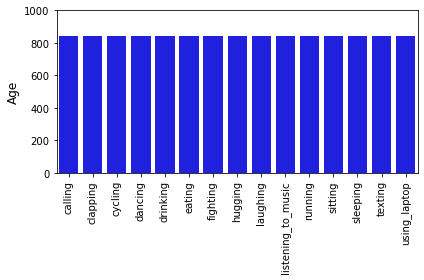

In [37]:
lab_plot = sns.barplot(x = 'label',
            y = 'filename',
            data = grp_label_dist,
            color='blue')

plt.setp(lab_plot.get_xticklabels(), rotation=90)
plt.ylim(0, 1000)
lab_plot.tick_params(length = 4, axis='x')
lab_plot.set_ylabel("Age", fontsize=12)
lab_plot.set_xlabel("", fontsize=1.5)
plt.tight_layout()

### Test set stats

In [54]:
test_count =  df_test_csv['filename'].nunique()

print('Total test image count: %s' % test_count)

Total test image count: 5400


## View some examples 

let's select a category and display a few example images!

In [72]:
# get samples based on a label
def sel_sample(_label, sample_size):
    sample_list = ()
    if _label == 'all':
        df_train_csv_filt = df_train_csv.head(1500)
        samples = df_train_csv_filt.sample(sample_size,random_state=2)
        sample_list = samples['filename'].tolist()   
        
    else:
        df_train_csv_filt = df_train_csv.head(1500)
        samples = df_train_csv_filt[df_train_csv_filt['label'] == _label].sample(sample_size,random_state=2)
        sample_list = samples['filename'].tolist()
    
    for s in range(len(sample_list)):
        sample_list[s] = train_path + sample_list[s]
    return sample_list


def show_img(filename: str=None) -> None:

    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(image)



### Sitting examples

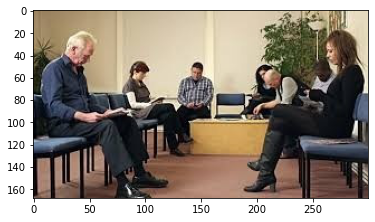

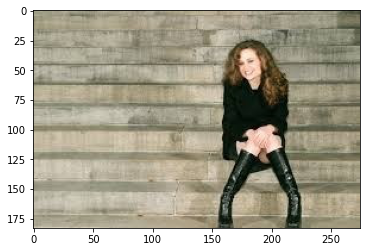

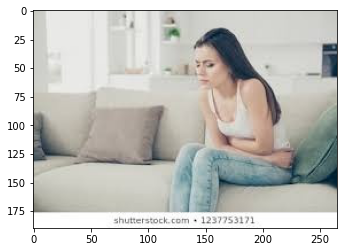

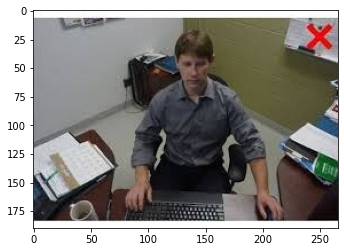

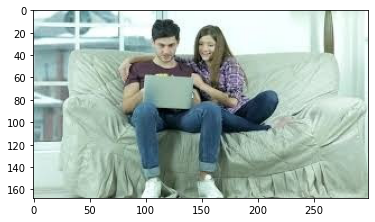

In [73]:
sample_list = sel_sample('sitting',5)

for s in sample_list:
    show_img(s)


### Running examples

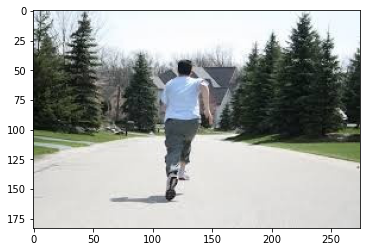

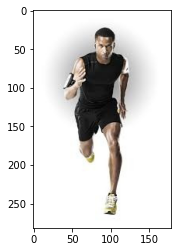

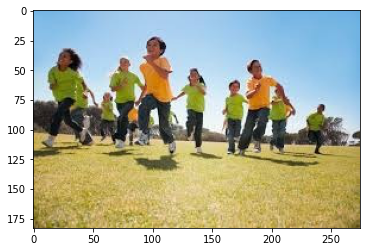

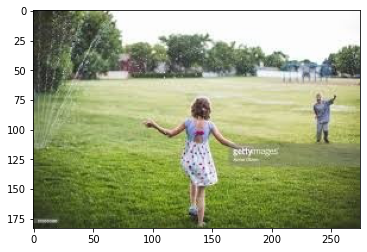

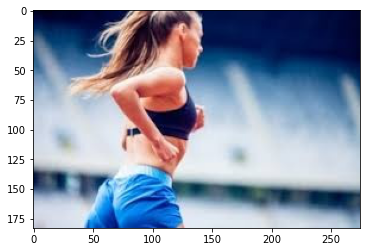

In [74]:
sample_list = sel_sample('running',5)

for s in sample_list:
    show_img(s)

## What is the typical image structure / dim profile?

Our model will ingest raw pixel data as it's primary training feature, so we want to get an understanding of how a typical image is structured

In [81]:
# first get all raw files direct from the train image folder (we don't need associated labels)
folder = os.fsencode(train_path)

filenames = []

for file in os.listdir(folder):
    filename = os.fsdecode(file)
    if filename.endswith('.jpg'): 
        filenames.append(train_path+filename)


In [83]:
# next get the widths and heights for each image
width = []
height = []


for f in filenames:
    img = Image.open(f)
  
    # get width and height
    width.append(img.width)
    height.append(img.height)

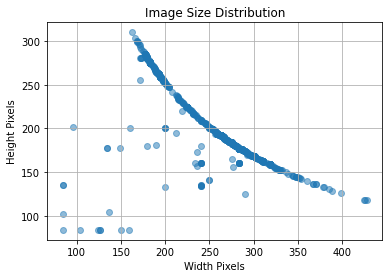

In [87]:
# show the distribution of image sizes

plt.scatter(width, height, alpha=0.5)
plt.xlabel('Width Pixels')
plt.ylabel('Height Pixels')
plt.title('Image Size Distribution')
plt.grid(True)

plt.show()

In [136]:
df_pixels = pd.DataFrame({'width' : width,
                                'height' : height})

df_pixels['dims']  = df_pixels['width'].astype(str) + "-" + df_pixels['height'].astype(str)
df_pixels['ratio'] = df_pixels['width'] / df_pixels['height']

df_pixels_grp = df_pixels.groupby('dims').agg({'width':'count'}).reset_index().sort_values(by='width', ascending = False)

df_pixels_grp = df_pixels_grp.rename(columns={'width':'count'})

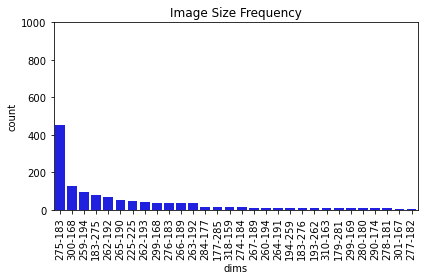

In [139]:
dim_plot = sns.barplot(x = 'dims',
            y = 'count',
            data = df_pixels_grp.head(30),
            color='blue')

plt.setp(dim_plot.get_xticklabels(), rotation=90)
plt.title('Image Size Frequency')
plt.ylim(0, 1000)

plt.tight_layout()

In [138]:
df_pixels_grp['count'].head(1).values / df_pixels_grp['count'].sum()

array([0.25581395])

In [ ]:
# 25% of the train images are comprised of the 275 x 183 dim